In [1]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# test first request with data of Microsoft
msft = yf.Ticker("MSFT")
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 163000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and de

In [13]:
df_msft_hist = msft.history(start='2020-12-29', end='2020-12-30')

df_msft_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-28,224.449997,226.029999,223.020004,224.960007,17933500,0,0
2020-12-29,226.309998,227.179993,223.580002,224.149994,17348000,0,0


In [4]:
#add two columns relativizing the volumes and stock prices over the last 100 values
df_msft_hist["rel Volume"] = df_msft_hist["Volume"]/df_msft_hist["Volume"].rolling(100).mean()
df_msft_hist["rel Close"] = df_msft_hist["Close"]/df_msft_hist["Close"].rolling(100).mean()

df_msft_hist[240:250]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,rel Volume,rel Close
Date,,,,,,,,,
1987-02-24,0.159706,0.167995,0.159706,0.167443,120816000,0.0,0.0,1.761968,1.471982
1987-02-25,0.167443,0.170482,0.163574,0.164680,65001600,0.0,0.0,0.942168,1.434727
1987-02-26,0.164680,0.175732,0.161364,0.170758,145209600,0.0,0.0,2.065674,1.473779
1987-02-27,0.170758,0.171864,0.166890,0.169653,37555200,0.0,0.0,0.537896,1.451434
1987-03-02,0.169653,0.169653,0.163574,0.164680,79516800,0.0,0.0,1.135695,1.397421
1987-03-03,0.164680,0.166337,0.162469,0.164680,81100800,0.0,0.0,1.164724,1.386369
1987-03-04,0.164680,0.176837,0.164127,0.176284,98179200,0.0,0.0,1.408858,1.471266
1987-03-05,0.176284,0.188442,0.176284,0.184574,128188800,0.0,0.0,1.826014,1.526648
1987-03-06,0.184574,0.185679,0.179600,0.184021,63561600,0.0,0.0,0.900743,1.508221


<AxesSubplot:xlabel='Date', ylabel='rel Volume'>

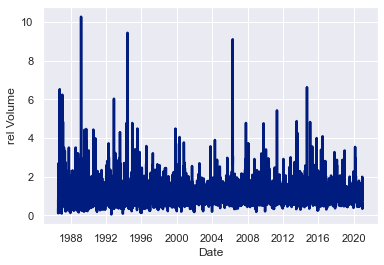

In [5]:
#plot the stock price history
sns.set_theme(palette="dark")

#sns.lineplot(data=df_msft_hist[["rel Close","rel Volume"]], lw=2.5)
sns.lineplot(data=df_msft_hist["rel Volume"], lw=2.5)

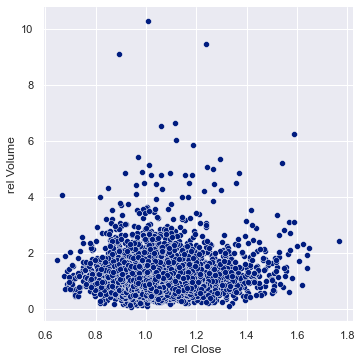

In [6]:
sns.relplot(x="rel Close", y="rel Volume", data=df_msft_hist)

<AxesSubplot:>

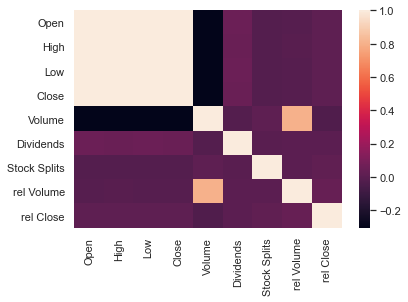

In [7]:
sns.heatmap(df_msft_hist.corr())

In [8]:
#test